# Kaggle Titanic Data Classification Project

#### The aim of the project is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [237]:
#Imports
import pandas as pd
import numpy as np
import scipy.stats as sct 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings(action = 'ignore')
sns.set_style('whitegrid')
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

In [145]:
# Loading the data as a data-frame
df = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [146]:
# Checking the basic info of the data
df.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

#### 'Survived' column is the Target Variable to be predicted.

In [147]:
# Checking the descriptive stats of the data.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Preprocessing and Exploratory Data Analysis

In [148]:
# Treating Null Values
df.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

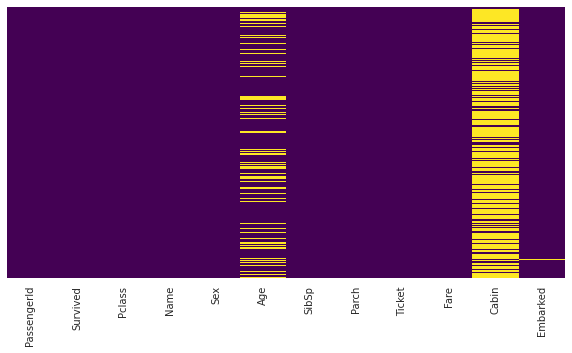

In [149]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)

<AxesSubplot:>

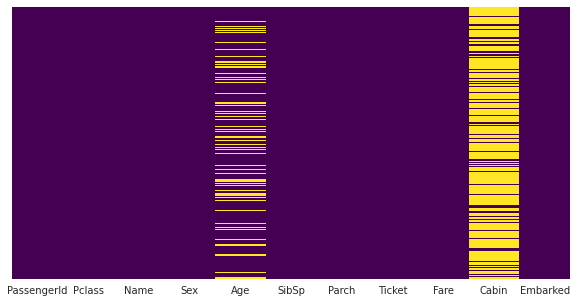

In [150]:
plt.figure(figsize=(10,5))
sns.heatmap(test.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [151]:
# Checking 'Cabin' Column
df['Cabin'].nunique()
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [152]:
# We drop 'Cabin' column because it has too many null values.
df.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

In [153]:
# Checking out the 'Age' column
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

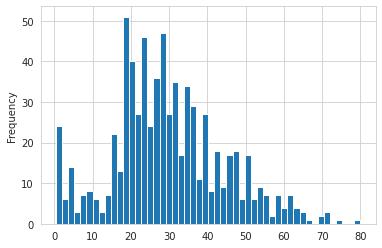

In [154]:
df['Age'].dropna().plot.hist(bins=50)

#### Looks like the Titanic had more young passengers.

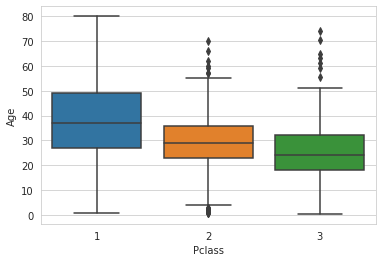

In [155]:
sns.boxplot(y = 'Age',x = 'Pclass',data = df)
plt.show()

In [156]:
# We fill the null values for 'Age' column according to the median age according to 'Pclass'
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age

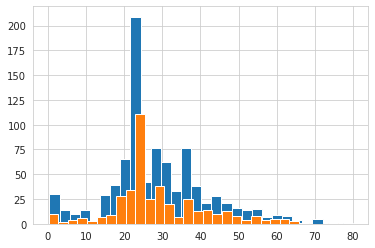

In [157]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis = 1)
df['Age'].hist(bins = 30)
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis = 1)
test['Age'].hist(bins = 30)
plt.show()

In [158]:
df.dropna(inplace = True)
df.info()
test['Fare'].fillna(15, inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [159]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [160]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [161]:
df.drop(['PassengerId','Ticket', 'Name'], axis = 1, inplace = True)
test.drop(['PassengerId','Ticket', 'Name'], axis = 1, inplace = True)

In [162]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

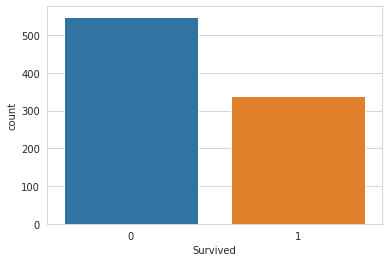

In [163]:
sns.countplot(df['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

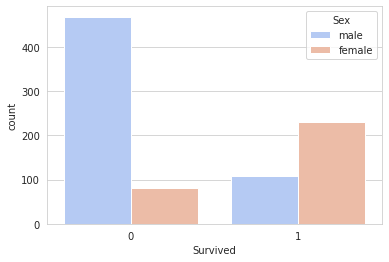

In [164]:
sns.countplot(df['Survived'], hue = df['Sex'], palette='coolwarm')
# Man had less chance of Surviving.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

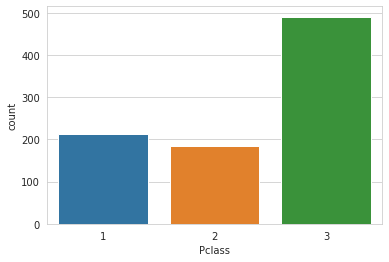

In [165]:
sns.countplot(df['Pclass'])

#### Most Passengers Travelled 3rd Class

<AxesSubplot:xlabel='Survived', ylabel='count'>

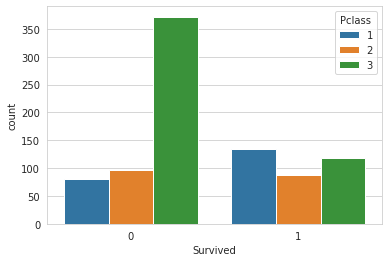

In [166]:
sns.countplot(df['Survived'], hue = df['Pclass'])

#### Most Passengers who didn't survive were also from 3rd Class 

<AxesSubplot:xlabel='Parch', ylabel='count'>

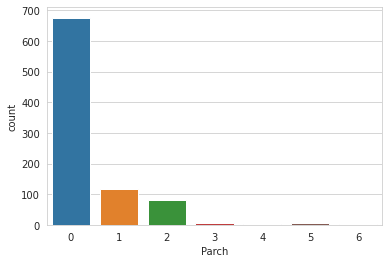

In [167]:
sns.countplot(df['Parch'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

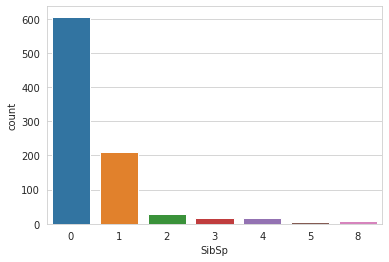

In [168]:
sns.countplot(df['SibSp'])

#### Most passengers travelled alone.

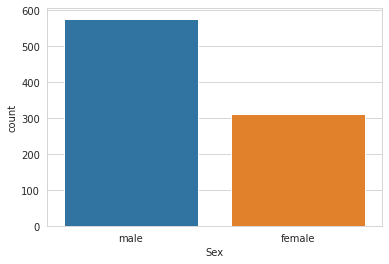

male      577
female    312
Name: Sex, dtype: int64

In [169]:
sns.countplot(df["Sex"])
plt.show()
df['Sex'].value_counts()

<AxesSubplot:ylabel='Frequency'>

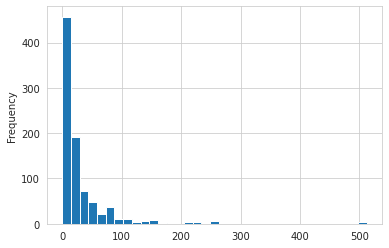

In [170]:
df['Fare'].plot.hist(bins =35)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

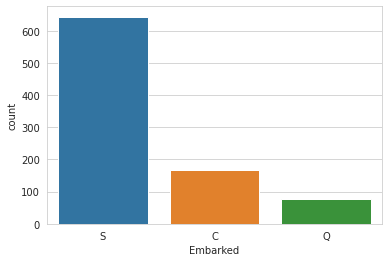

In [171]:
sns.countplot(df['Embarked'])

### Treating Discrete Variables

In [172]:
df.head()
# 'Pclass', 'Sex', 'Embarked' need to be converted

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [173]:
p_g = pd.get_dummies(df['Pclass'])
s_g = pd.get_dummies(df['Sex'], drop_first=True)
e_g = pd.get_dummies(df['Embarked'])
df = pd.concat([df, p_g, s_g, e_g], axis = 1)
df = df.drop(['Pclass', 'Sex', 'Embarked'], axis = 1)

In [174]:
p_g = pd.get_dummies(test['Pclass'])
s_g = pd.get_dummies(test['Sex'], drop_first=True)
e_g = pd.get_dummies(test['Embarked'])
test = pd.concat([test, p_g, s_g, e_g], axis = 1)
test = test.drop(['Pclass', 'Sex', 'Embarked'], axis = 1)

In [175]:
# We drop 'Parch' and 'SibSp' because these columns have low variation.
df.drop(['Parch', 'SibSp'], axis = 1, inplace = True)
test.drop(['Parch', 'SibSp'], axis = 1, inplace = True)

In [176]:
df.head()

,Survived,Age,Fare,1,2,3,male,C,Q,S
0,0,22.0,7.2500,0,0,1,1,0,0,1
1,1,38.0,71.2833,1,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,0,0,0,1
3,1,35.0,53.1000,1,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,1,0,0,1


### Model Building

In [203]:
# Separating Independent and Dependent Variables.
X_train = df.drop('Survived', axis = 1)
y_train = df[['Survived']]
print(test.shape)
print(X_train.shape)

(418, 9)
(889, 9)


In [204]:
test.head()

,Age,Fare,1,2,3,male,C,Q,S
0,34.5,7.8292,0,0,1,1,0,1,0
1,47.0,7.0000,0,0,1,0,0,0,1
2,62.0,9.6875,0,1,0,1,0,1,0
3,27.0,8.6625,0,0,1,1,0,0,1
4,22.0,12.2875,0,0,1,0,0,0,1


In [205]:
X_train.head()

,Age,Fare,1,2,3,male,C,Q,S
0,22.0,7.2500,0,0,1,1,0,0,1
1,38.0,71.2833,1,0,0,0,1,0,0
2,26.0,7.9250,0,0,1,0,0,0,1
3,35.0,53.1000,1,0,0,0,0,0,1
4,35.0,8.0500,0,0,1,1,0,0,1


In [180]:
#X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 41, test_size = 0.3)

### Logistic Regression

In [206]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
#pred = lg.predict(X_val)

LogisticRegression()

In [182]:
'''print(confusion_matrix(y_val,pred))
print('\n')
print(classification_report(y_val, pred))'''

[[134  21]
 [ 33  79]]


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       155
           1       0.79      0.71      0.75       112

    accuracy                           0.80       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267



In [207]:
logi = lg.predict(test)

In [209]:
test1 = pd.read_csv('../input/titanic/test.csv')
ID = test1['PassengerId']

In [210]:
submission = pd.DataFrame({'Survived':preds, 'PassengerID': ID})
submission.to_csv('Logistic.csv', index=False)

In [211]:
dtc = DecisionTreeClassifier()
parameters = {'criterion':['gini', 'entropy', 'log_loss'],
             'max_depth':range(1,31)}
folds = 10
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=41)

In [212]:
gs = GridSearchCV(dtc, parameters, cv = skf.split(X_train, y_train))

In [213]:
gs.fit(X_train, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f5ad8ab9550>,
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 31)})

In [214]:
gt = gs.best_estimator_
gt

DecisionTreeClassifier(max_depth=8)

In [215]:
gs.best_score_

0.8234678243105209

In [216]:
decision = gt.predict(test)
'''print(confusion_matrix(y_val, pred1))
print('\n')
print(classification_report(y_val, pred1))'''

"print(confusion_matrix(y_val, pred1))\nprint('\n')\nprint(classification_report(y_val, pred1))"

In [218]:
submission = pd.DataFrame({'Survived':decision, 'PassengerID': ID})
submission.to_csv('decision.csv', index = False)

In [219]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
random = rfc.predict(test)
"""print(confusion_matrix(y_val, pred2))
print('\n')
print(classification_report(y_val, pred2))"""

"print(confusion_matrix(y_val, pred2))\nprint('\n')\nprint(classification_report(y_val, pred2))"

In [220]:
submission = pd.DataFrame({'Survived':random, 'PassengerID': ID})
submission.to_csv('random.csv', index = False)

In [221]:
parameters = {'criterion':['gini', 'entropy', 'log_loss'],
             'max_depth':range(1,31), 'n_estimators':range(1, 1000, 100)}
rgs = RandomizedSearchCV(rfc, parameters, cv = skf.split(X_train, y_train))
rgs.fit(X_train, y_train)

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f5ad8ab9650>,
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(1, 31),
                                        'n_estimators': range(1, 1000, 100)})

In [222]:
rgt = rgs.best_estimator_
rgs.best_score_

0.8323927477017365

In [223]:
cvs = rgt.predict(test)
'''print(confusion_matrix(y_val, pred3))
print('\n')
print(classification_report(y_val, pred3))'''

"print(confusion_matrix(y_val, pred3))\nprint('\n')\nprint(classification_report(y_val, pred3))"

In [224]:
submission = pd.DataFrame({'Survived':cvs, 'PassengerID': ID})
submission.to_csv('cvs.csv', index = False)

In [230]:
xmodel = xgb.XGBClassifier()
xmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [231]:
x_pred = xmodel.predict(test)
submission = pd.DataFrame({'Survived':x_pred, 'PassengerID': ID})
submission.to_csv('x_pred.csv', index = False)

In [232]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [233]:
xcvs = GridSearchCV(xmodel, params, cv = skf.split(X_train, y_train))
xcvs.fit(X_train, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f5a5882c5d0>,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints...
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estima

In [235]:
x_best = xcvs.best_estimator_
xcvs.best_score_

0.8459269662921347

In [236]:
xcvs_pred = x_best.predict(test)
submission = pd.DataFrame({'Survived':xcvs_pred, 'PassengerID': ID})
submission.to_csv('xcvs_pred.csv', index = False)

In [243]:
params = {'n_neighbors': range(1,100)}

model = KNeighborsClassifier()
k = GridSearchCV(model, params, cv = skf.split(X_train, y_train))
k.fit(X_train, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f5a530f1ed0>,
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100)})

In [248]:
model_18 = k.best_estimator_
pred_18 = model_18.predict(test)
submission = pd.DataFrame({'Survived':pred_18, 'PassengerID': ID})
submission.to_csv('pred_18.csv', index = False)